SPIKE TIMINING AVERAGE

In [1]:
from __future__ import division
import pickle 


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 60000


In [11]:

###READING DATA FROM PICKLED NEURODATA 

data = pickle.load(open( "neruondata.pickle", "rb" ))
stim = data['stim']
rho = data['rho']

In [12]:
pd.DataFrame(data)

,stim,rho
0,-111.948242,0
1,-81.806641,0
2,10.219727,0
3,83.364258,0
4,69.375000,0
...,...,...
599995,3.803711,0
599996,3.657227,0
599997,9.785156,0
599998,24.111328,0


In [22]:
rhodf = pd.Series(data["rho"])
stimdf = pd.Series(data["stim"])
times = list(rhodf.values.nonzero())[0]
rhodf1 = pd.DataFrame(data["rho"])
stimdf1 = pd.DataFrame(data["stim"])

,Spike Time
0,17
1,22
2,25
3,31
4,34
...,...
53596,599818
53597,599823
53598,599936
53599,599941


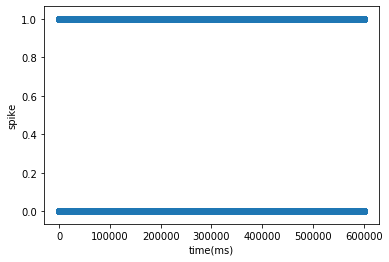

In [23]:
plt.scatter(np.arange(rhodf.values.size),rhodf.values)
plt.xlabel("time(ms)")
plt.ylabel("spike")
pd.DataFrame(data={'Spike Time': times})

In [27]:
### Correlation of columns b/w stimlus and spike train 
pd.DataFrame(data).corr()

,stim,rho
stim,1.000000,0.000484
rho,0.000484,1.000000


In [74]:
def compute_sta(stim, rho, num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.
    
    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA
        
    Returns:
        spike-triggered average for num_timesteps timesteps before spike"""
    
    sta = np.zeros((num_timesteps,))
    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps
    stim_size = stim.size
    # Fill in this value. Note that you should not count spikes that occur
    # before 300 ms into the recording.
    num_spikes = spike_times.size
    num_ones = np.ones((num_timesteps,))
    index_sta = 0                     

    
    # Compute the spike-triggered average of the spikes found.
    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    while index_sta < sta.size:
        for i in spike_times :
            leftpad = np.zeros((i-num_timesteps,))
            rightpad = np.zeros((stim_size-i,))
            mask = np.concatenate([leftpad , num_ones , rightpad])
            try:
                sta[index_sta] = (np.dot(np.transpose(mask),stim)/ num_spikes)
            except:
                break
            index_sta +=1
    return sta
    

In [85]:
spike_times = rho[150:].nonzero()[0] + 150
spike_times.size

53583

In [83]:
sampling_period = 2# in ms
num_timesteps = 150

sta = compute_sta(stim, rho, num_timesteps)

time = (np.arange(-num_timesteps, 0) + 1) * sampling_period
spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps

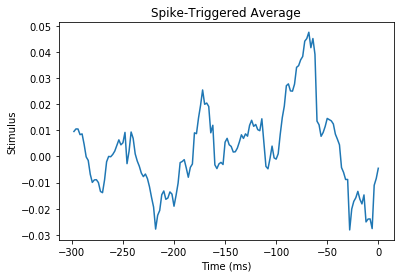

In [84]:

plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

plt.show()
